In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('D:\\Kargo\\Risk Analysis\\cnn_weekend_50k.csv')
df.head(10)

,DATE,INVIEW_VIEWABLE,INVIEW_MEASURABLE,BELOW_FOLD_AD,ACTIVE_PAGE_DWELL,SCROLL,TIME_UNTIL_SCROLL,TIME_UNTIL_INVIEW,TIME_UNTIL_HOVER,TOTAL_EXPOSURE_TIME,FULL_INVIEW,OLD_BROWSER,SIZE,FORMAT,EXECUTION
0,2017-09-02,0,1,1,396,0,-1,-1,-1,0,0,0,300x250,MiddleBanner,animated
1,2017-09-01,0,1,1,393,1,78,-1,-1,0,0,0,300x250,MiddleBanner,video_rm
2,2017-09-02,0,1,1,456,1,194,-1,-1,0,0,0,300x250,MiddleBanner,video_rm
3,2017-09-02,0,1,1,238,0,-1,-1,-1,0,0,0,300x250,MiddleBanner,video_rm
4,2017-09-02,0,1,1,405,0,-1,-1,-1,0,0,0,300x250,MiddleBanner,video_rm
5,2017-09-01,0,1,1,144,0,-1,-1,-1,0,0,0,320x50,MiddleBanner,standard
6,2017-09-02,1,1,1,1885,0,-1,1270,-1,1288,1,0,1x1,SideKick,slide_to_reveal
7,2017-09-03,1,1,1,24890,1,1085,23656,-1,2187,1,0,300x250,MiddleBanner,video_rm
8,2017-09-02,0,1,1,208,1,171,-1,-1,0,0,1,1x1,Venti,silhouette
9,2017-09-02,1,1,1,1741,0,-1,1504,-1,1183,1,0,1x1,SideKick,animated


What's the average APD for a given ad format by old browser flag?

In [3]:
df.pivot_table(values='ACTIVE_PAGE_DWELL', index=['SIZE','FORMAT'], columns=['OLD_BROWSER'])

OLD_BROWSER                      0             1
SIZE    FORMAT                                  
1x1     Anchor        20030.940574  41657.352113
        BreakOut      11752.547493  43247.489362
        Hover         68688.000000  19741.000000
        MiddleBanner  21636.682667  52253.562500
        SideKick      13141.579721  38163.109375
        Spotlight     36407.356522  48048.966667
        Venti         20670.284376  44710.598930
300x250 MiddleBanner  22333.558189  42551.803279
320x50  Hover         13719.099119  46848.074866
        MiddleBanner  22082.764528  43407.714286

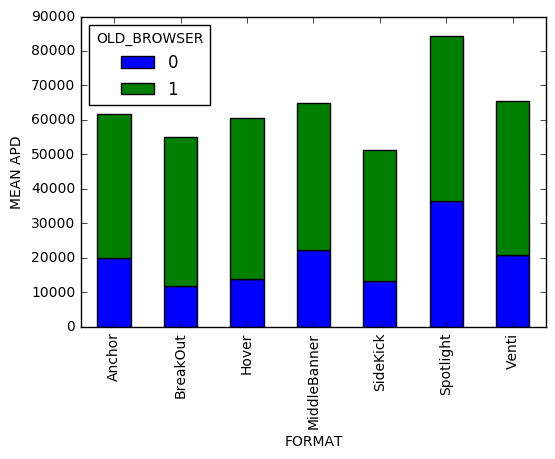

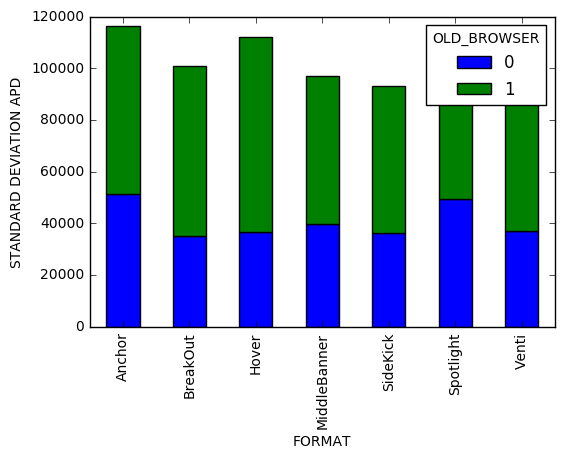

In [4]:
df.pivot_table(values='ACTIVE_PAGE_DWELL', index=['FORMAT'], columns=['OLD_BROWSER']).plot(kind="bar", stacked=True).set_ylabel("MEAN APD")
df.pivot_table(values='ACTIVE_PAGE_DWELL', index=['FORMAT'], columns=['OLD_BROWSER'], aggfunc='std').plot(kind="bar", stacked=True).set_ylabel("STANDARD DEVIATION APD")

Old browser's seem to have mucher higher average APD, let's check the same for TET:

In [5]:
df.pivot_table(values='TOTAL_EXPOSURE_TIME', index=['FORMAT'], columns=['OLD_BROWSER'])

OLD_BROWSER,0,1
FORMAT,,
Anchor,4111.561475,8809.985915
BreakOut,10345.911609,38083.617021
Hover,10655.290422,33577.856383
MiddleBanner,826.472127,1356.143354
SideKick,7933.667957,26702.869792
Spotlight,1104.857971,1390.033333
Venti,603.205579,1262.943850


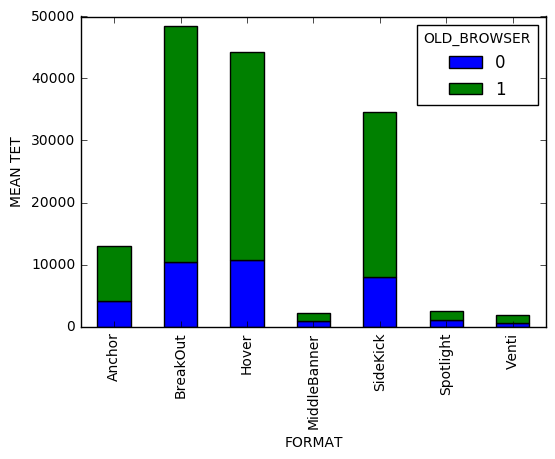

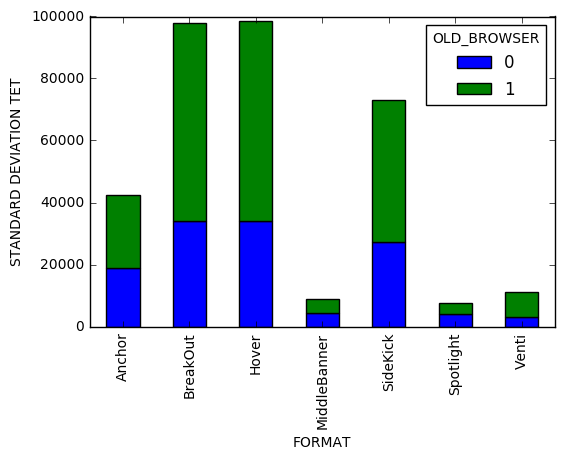

In [6]:
df.pivot_table(values='TOTAL_EXPOSURE_TIME', index=['FORMAT'], columns=['OLD_BROWSER']).plot(kind="bar", stacked=True).set_ylabel("MEAN TET")
df.pivot_table(values='TOTAL_EXPOSURE_TIME', index=['FORMAT'], columns=['OLD_BROWSER'], aggfunc='std').plot(kind="bar", stacked=True).set_ylabel("STANDARD DEVIATION TET")

Old browsers have even higher margins of Total Exposure Time.  There are 2 things to note:
a) The low total exposure time of middlebanner, spotlight and venti units
b) It may be worth running a query in Snowflake to find these results across all the data

In [7]:
df.groupby('FORMAT')['DATE'].count()

FORMAT
Anchor            559
BreakOut          805
Hover            2464
MiddleBanner    37246
SideKick         2776
Spotlight         435
Venti            5715
Name: DATE, dtype: int64

Despite being the most popular format, MiddleBanner performs the worst on viewability

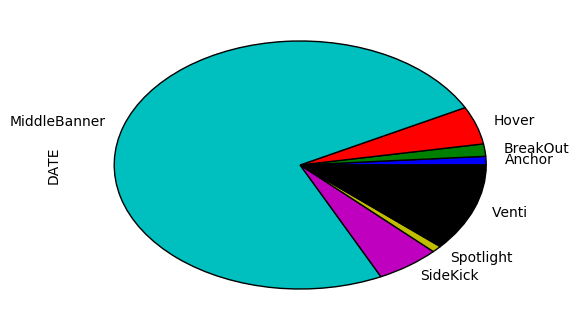

In [8]:
df.groupby('FORMAT')['DATE'].count().plot(kind="pie")

In [9]:
df.pivot_table(values='TOTAL_EXPOSURE_TIME', index=['FORMAT'], columns=['OLD_BROWSER','FULL_INVIEW']).fillna(0)

OLD_BROWSER             0                         1              
FULL_INVIEW             0             1           0             1
FORMAT                                                           
Anchor         757.375000   4346.942982    0.000000  10088.854839
BreakOut       194.380952  10635.168250    0.000000  38083.617021
Hover          179.619835  11243.483527    0.000000  36072.211429
MiddleBanner    91.296205   2534.471422  187.370282   4437.789889
SideKick      1411.157895   8341.324836   49.961538  30877.421687
Spotlight      296.475806   3171.649485   47.916667   4074.266667
Venti          186.922246   2238.000923  698.509868   3714.200000

In [10]:
np.corrcoef(df['FULL_INVIEW'],df['TOTAL_EXPOSURE_TIME'])

array([[ 1.        ,  0.19569918],
       [ 0.19569918,  1.        ]])

In [68]:
np.corrcoef(df['OLD_BROWSER'],df['TOTAL_EXPOSURE_TIME'])

array([[ 1.        ,  0.06670191],
       [ 0.06670191,  1.        ]])

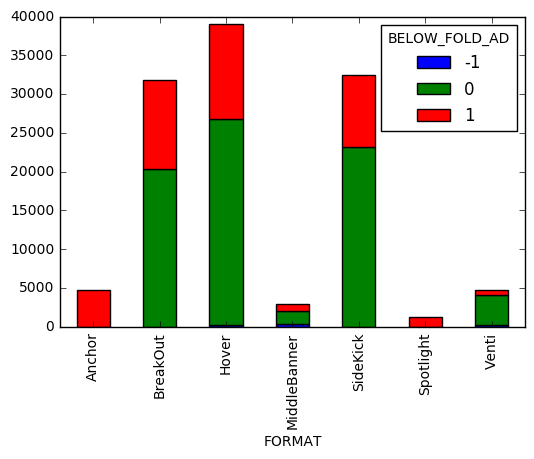

In [11]:
df.pivot_table(values='TOTAL_EXPOSURE_TIME', index=['FORMAT'], columns=['BELOW_FOLD_AD']).fillna(0).plot(kind="bar", stacked=True)

No idea what "-1" below fold means

Lets our low APD/TET proportions:

14770 out of 50000


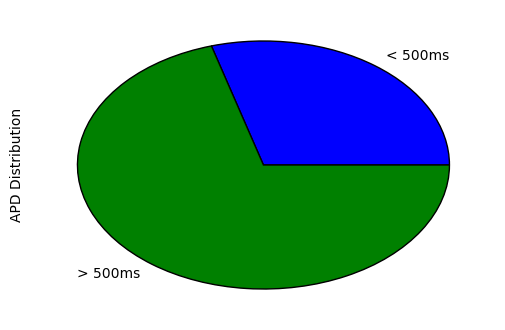

In [13]:
print(df[df['ACTIVE_PAGE_DWELL'] <= 500]['DATE'].count(), 'out of', \
      df['DATE'].count())

df['seen']=np.where(df['ACTIVE_PAGE_DWELL'] < 500,"< 500ms","> 500ms")

test = df.groupby('seen')['DATE'].count().plot(kind="pie").set_ylabel("APD Distribution")

30909 out of 50000


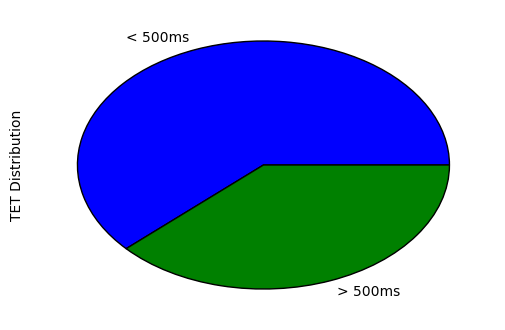

In [14]:
print(df[df['TOTAL_EXPOSURE_TIME'] <= 500]['DATE'].count(), 'out of', \
      df['DATE'].count())

df['seen']=np.where(df['TOTAL_EXPOSURE_TIME'] < 500,"< 500ms","> 500ms")

test = df.groupby('seen')['DATE'].count().plot(kind="pie").set_ylabel("TET Distribution")

In [22]:
df.groupby('FULL_INVIEW')['TOTAL_EXPOSURE_TIME'].mean()

FULL_INVIEW
0     124.224466
1    5400.333083
Name: TOTAL_EXPOSURE_TIME, dtype: float64

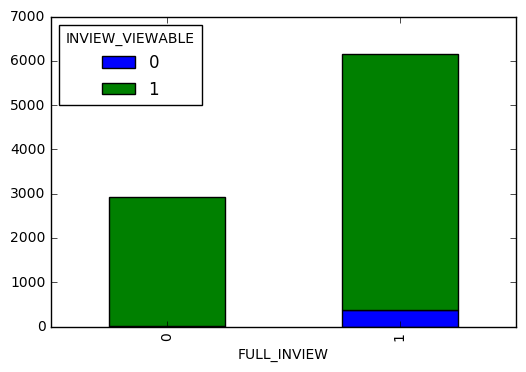

In [27]:
df.pivot_table(values='TOTAL_EXPOSURE_TIME', index=['FULL_INVIEW'], columns=['INVIEW_VIEWABLE']).plot(kind="bar", stacked=True)

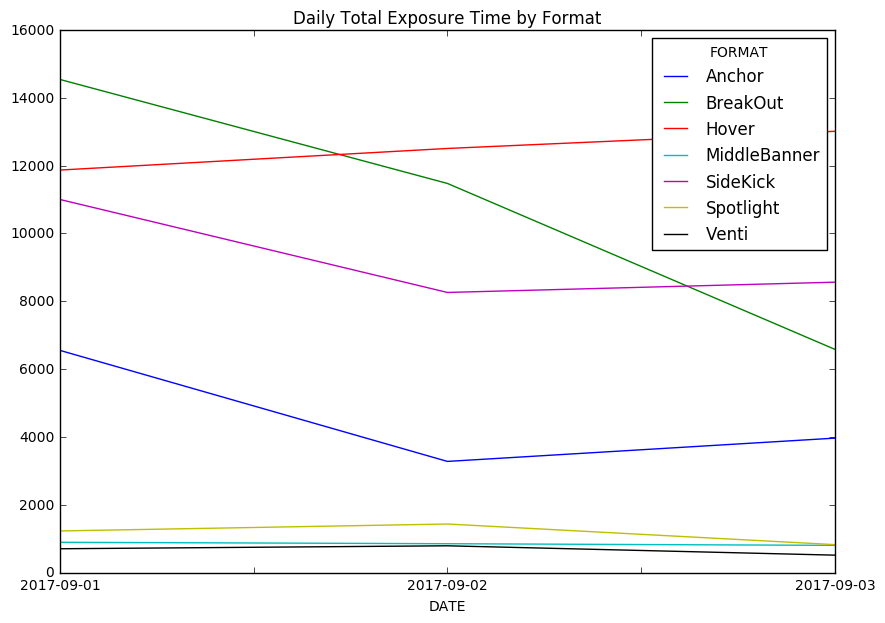

In [28]:
df.pivot_table('TOTAL_EXPOSURE_TIME', index='DATE', columns='FORMAT').plot(figsize=(10,7),\
                                                                           title="Daily Total Exposure Time by Format")

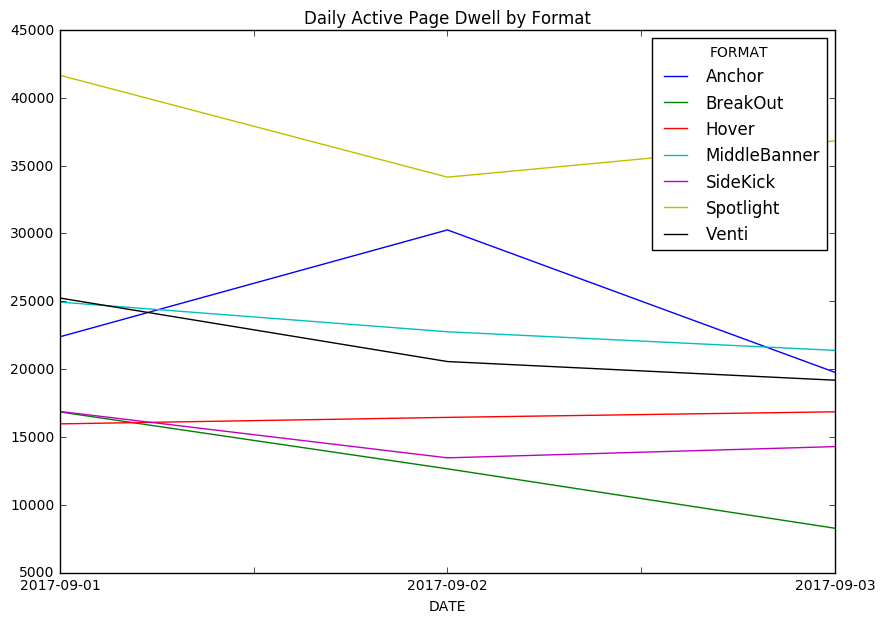

In [29]:
df.pivot_table('ACTIVE_PAGE_DWELL', index='DATE', columns='FORMAT').plot(figsize=(10,7),\
                                                                           title="Daily Active Page Dwell by Format")

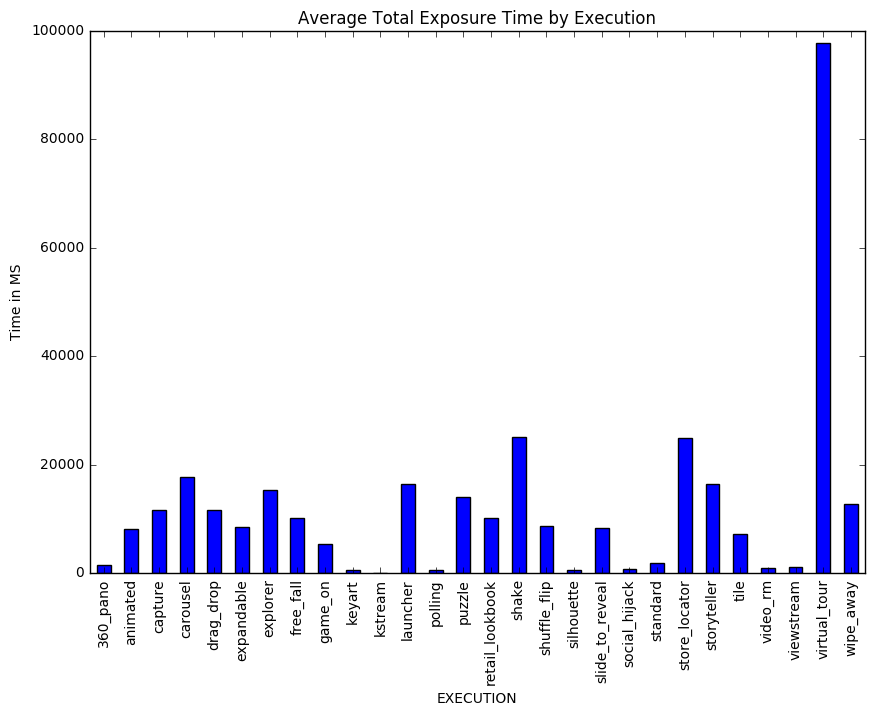

In [44]:
df.groupby('EXECUTION')['TOTAL_EXPOSURE_TIME'].mean().plot(kind="bar", figsize=(10,7), \
                                                           title="Average Total Exposure Time by Execution").set_ylabel("Time in MS")